Penalizing Synthetic Data


In [134]:

import numpy as np
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
sns.set()
rand_state = 1000



In [135]:
df = pd.read_csv('https://raw.githubusercontent.com/PJalgotrader/Machine_Learning-USU/main/data/Regularization_synthetic.csv')

In [136]:
df.head()


,X1,X2,X3,X4,X5,y
0,1.668068,2.782452,4.641320,7.742038,12.914249,-3.901562
1,0.925862,0.857220,0.793667,0.734826,0.680348,-0.384578
2,1.057997,1.119357,1.184276,1.252960,1.325628,12.493677
3,-0.920339,0.847024,-0.779549,0.717449,-0.660297,12.237389
4,1.299748,1.689346,2.195725,2.853890,3.709339,-3.772851


(100, 6)

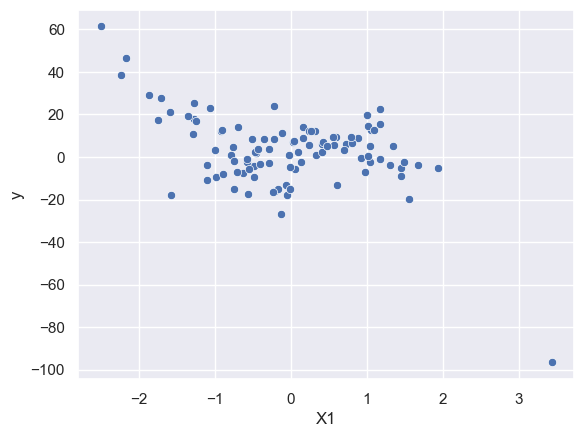

In [137]:
sns.scatterplot(x='X1', y='y',data= df)
df.shape

Scaling

In [138]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_sc=scaler.fit_transform(df)
df_sc.shape




(100, 6)

Since an array convert to dataframe again

In [139]:
df_sc = pd.DataFrame(df_sc,columns=df.columns)
df_sc.head()

,X1,X2,X3,X4,X5,y
0,1.685595,1.103796,0.939693,0.285295,0.208938,-0.411601
1,0.955517,-0.112695,0.155823,-0.194689,-0.040086,-0.206709
2,1.085492,0.052941,0.235401,-0.159198,-0.026951,0.543551
3,-0.860516,-0.119138,-0.164683,-0.195880,-0.067375,0.528621
4,1.323294,0.413098,0.441460,-0.049537,0.021570,-0.404102


<Axes: xlabel='X1', ylabel='y'>

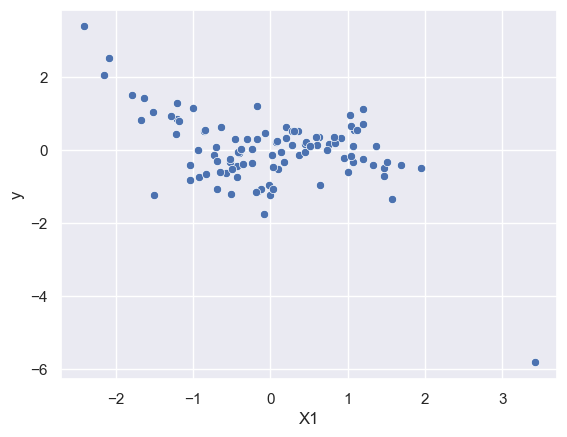

In [140]:
sns.scatterplot(x='X1',y='y',data = df_sc)

Splitting the Data

In [141]:
from sklearn.model_selection import train_test_split
X= df_sc.drop('y',axis=1)
y = df_sc['y']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=rand_state)
X_train.head()


,X1,X2,X3,X4,X5
6,-0.456730,-0.490096,-0.032868,-0.240396,-0.054636
13,-1.046354,0.123147,-0.283937,-0.141314,-0.088121
2,1.085492,0.052941,0.235401,-0.159198,-0.026951
99,-0.351126,-0.551985,-0.019151,-0.243226,-0.054149
8,-0.083108,-0.643664,-0.006316,-0.245004,-0.053935


adding constant

In [142]:
import statsmodels.api as sm
X_test_wc = sm.add_constant(X_test)
X_train_wc = sm.add_constant(X_train)



In [143]:
model = sm.OLS(y_train, X_train_wc).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     10.82
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           1.77e-07
Time:                        13:53:26   Log-Likelihood:                -57.139
No. Observations:                  67   AIC:                             126.3
Df Residuals:                      61   BIC:                             139.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0662      0.189      0.351      0.7

Training using all 4 models


In [144]:
from sklearn.linear_model import LinearRegression , Lasso,LassoCV, Ridge , RidgeCV,ElasticNet,ElasticNetCV

In [145]:
model_linear = LinearRegression()
model_lasso = Lasso(alpha=0)
model_ridge = Ridge(alpha=0)
model_net = ElasticNet(alpha=0)


In [146]:
import warnings
warnings.filterwarnings('ignore')

y_hat_linear = model_linear.fit(X_train,y_train).predict(X_test)
y_hat_lasso = model_lasso.fit(X_train,y_train).predict(X_test)
y_hat_ridge= model_ridge.fit(X_train,y_train).predict(X_test)
y_hat_net= model_net.fit(X_train,y_train).predict(X_test)
    

In [147]:
df_predictions = pd.DataFrame({'y_test':y_test,
                               'y_hat_linear':y_hat_linear,
                               'y_hat_ridge':y_hat_ridge,
                               'y_hat_lasso':y_hat_lasso,
                               'y_hat_net':y_hat_net})
df_predictions.head()

,y_test,y_hat_linear,y_hat_ridge,y_hat_lasso,y_hat_net
88,1.307243,0.120715,0.120715,0.120715,0.120715
4,-0.404102,0.042069,0.042069,0.042069,0.042069
62,-1.055680,-0.219175,-0.219175,-0.219175,-0.219175
63,2.538916,2.303307,2.303307,2.303307,2.303307
48,1.144605,-0.122621,-0.122621,-0.122621,-0.122621


In [148]:
coeff = df.drop( 'y',axis = 1).columns
coefficients = pd.DataFrame({'features': coeff})



In [149]:

coefficients = pd.DataFrame({'Features':df.drop('y', axis=1, inplace=False).columns})
coefficients['model_lin']= model_linear.coef_
coefficients['model_ridge']= model_ridge.coef_
coefficients['model_lasso']= model_lasso.coef_
coefficients['model_net']= model_net.coef_
coefficients

,Features,model_lin,model_ridge,model_lasso,model_net
0,X1,0.559607,0.559607,0.559607,0.559607
1,X2,0.186644,0.186644,0.186644,0.186644
2,X3,-1.950692,-1.950692,-1.950692,-1.950692
3,X4,0.163186,0.163186,0.163186,0.163186
4,X5,1.272826,1.272826,1.272826,1.272826


Pycaret penalizing

In [150]:
from pycaret.utils import version
version()

'3.3.2'

In [151]:
df.head()

,X1,X2,X3,X4,X5,y
0,1.668068,2.782452,4.641320,7.742038,12.914249,-3.901562
1,0.925862,0.857220,0.793667,0.734826,0.680348,-0.384578
2,1.057997,1.119357,1.184276,1.252960,1.325628,12.493677
3,-0.920339,0.847024,-0.779549,0.717449,-0.660297,12.237389
4,1.299748,1.689346,2.195725,2.853890,3.709339,-3.772851


In [160]:
from pycaret.regression import *

ImportError: cannot import name '_fit_context' from 'sklearn.base' (c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py)

In [161]:
setup(df,target = 'y',session_id = 1000,train_size=0.8,fold_stratergy = 'kfold', fold = 5,normalize=True,normalize_method='zscore')

NameError: name 'setup' is not defined